In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("2023-08-07-sin_goodnight_chat.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.head()

,timestamp,date,hour
0,2023-08-07 03:02:20.690000+00:00,2023-08-07,3.03
1,2023-08-07 01:20:28.327000+00:00,2023-08-07,1.33
2,2023-08-05 18:26:27.082000+00:00,2023-08-05,18.43
3,2023-08-04 06:38:55.843000+00:00,2023-08-04,6.63
4,2023-08-03 08:54:00.943000+00:00,2023-08-03,8.90


Text(0, 0.5, 'Count')

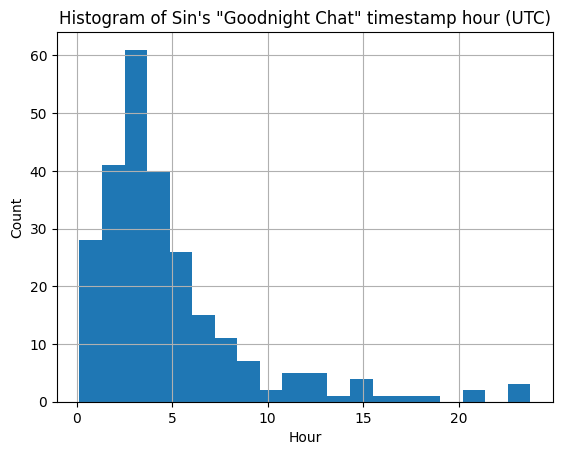

In [3]:
df.hour.hist(bins=20)
plt.title('Histogram of Sin\'s "Goodnight Chat" timestamp hour (UTC)')
plt.xlabel('Hour')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

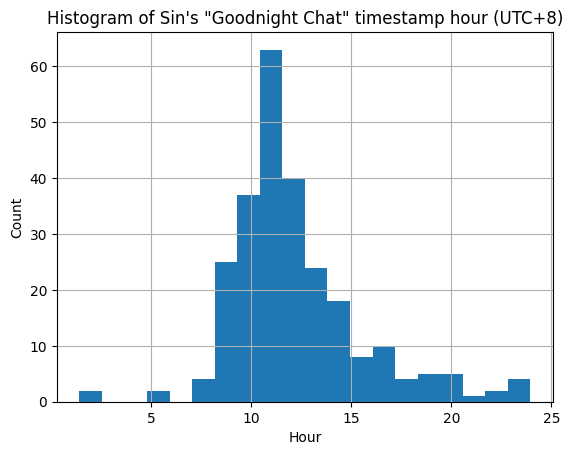

In [6]:
offset = 8
((df.hour+offset)%24).hist(bins=20)
plt.title(f'Histogram of Sin\'s "Goodnight Chat" timestamp hour (UTC{offset:+d})')
plt.xlabel('Hour')
plt.ylabel('Count')

In [7]:
daily_frequency = df.groupby("date").count().groupby("hour").count().reset_index()[["hour", "timestamp"]]
daily_frequency.columns = ["count", "frequency"]
daily_frequency

,count,frequency
0,1,130
1,2,48
2,3,8
3,4,1


Text(0.5, 1.0, 'Number of messages per day of the week')

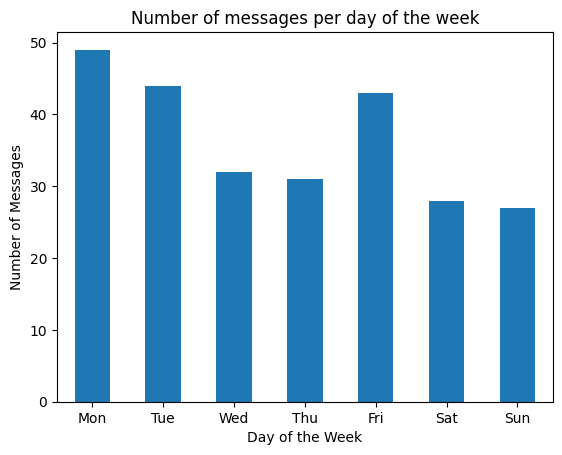

In [8]:
import numpy as np

# convert date to day of the week as a number
df['day_of_week'] = df['timestamp'].dt.dayofweek

df['day_of_week'].value_counts().sort_index().plot(kind='bar', rot=0)
# label day of the week as a string
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of the Week')
plt.ylabel('Number of Messages')
plt.title("Number of messages per day of the week")